In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import nbformat

import kaleido
os.environ.pop("PLOTLY_RENDERER", None)
pio.renderers.default = "vscode"

In [3]:
df = pd.read_csv('../data/car data.csv')
print("Размер датасета:", df.shape)
df.info()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numeric_cols)
print("Категориальные признаки:", categorical_cols)
df.describe(include='all')
target_column = 'Selling_Price'
print("Целевая переменная:", target_column)
print("\nУникальные значения в категориальных признаках:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} уникальных значений")
    print(f"Значения: {df[col].unique()}")
    print()

Размер датасета: (301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Числовые признаки: ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
Категориальные признаки: ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
Целевая переменная: Selling_Price

Уникальные значения в категориальных признаках:
Car_Name: 98 уникальных значений
Значения: ['ritz' 'sx4' 'ciaz' 'wagon r

In [4]:
initial_count = len(df)
df = df.drop_duplicates()
print(f"Удалено дубликатов: {initial_count - len(df)}")
print("Проверка аномальных значений:")
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} выбросов")

print("Проверка корректности данных:")
print(f"Минимальный год: {df['Year'].min()}")
print(f"Максимальный год: {df['Year'].max()}")
print(f"Минимальный пробег: {df['Driven_kms'].min()} км")
print(f"Максимальный пробег: {df['Driven_kms'].max()} км")
print(f"Минимальная цена продажи: {df['Selling_Price'].min()} млн ")
print(f"Максимальная цена продажи: {df['Selling_Price'].max()} млн" )

df['Owner'] = df['Owner'].astype('category')
print("Тип данных Owner:", df['Owner'].dtype)  # должен быть category

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Числовые признаки:", numeric_cols)
print("Категориальные признаки:", categorical_cols)

Удалено дубликатов: 2
Проверка аномальных значений:
Year: 7 выбросов
Selling_Price: 16 выбросов
Present_Price: 14 выбросов
Driven_kms: 8 выбросов
Owner: 11 выбросов
Проверка корректности данных:
Минимальный год: 2003
Максимальный год: 2018
Минимальный пробег: 500 км
Максимальный пробег: 500000 км
Минимальная цена продажи: 0.1 млн 
Максимальная цена продажи: 35.0 млн
Тип данных Owner: category
Числовые признаки: ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
Категориальные признаки: ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


find_ffmpeg failed, using the integrated library.
Opening in existing browser session.


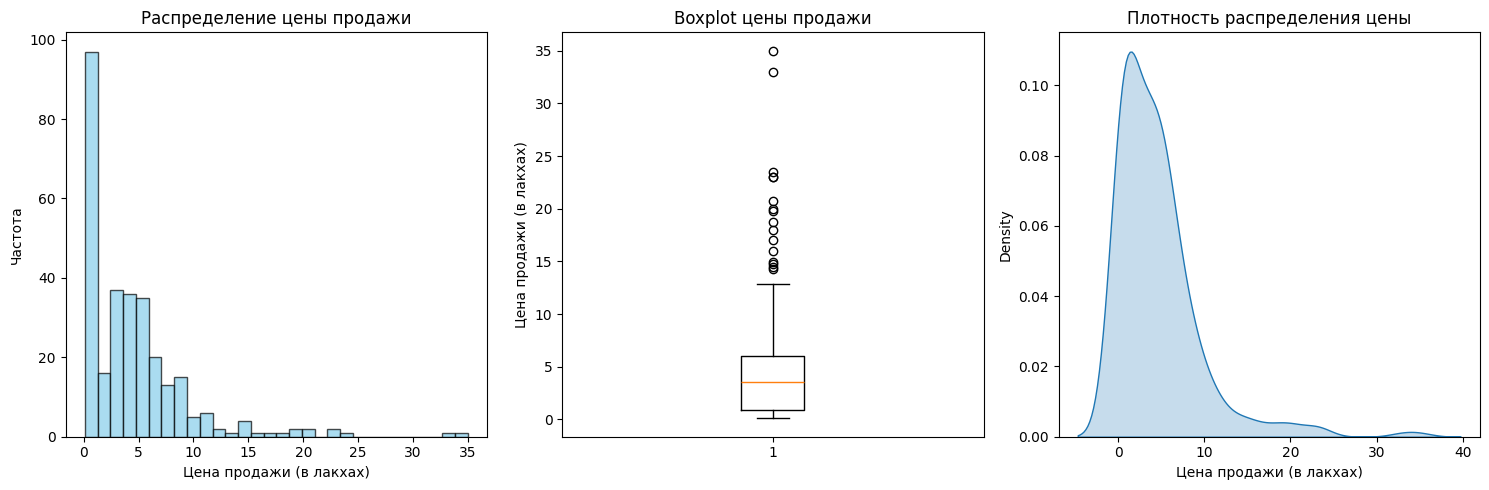

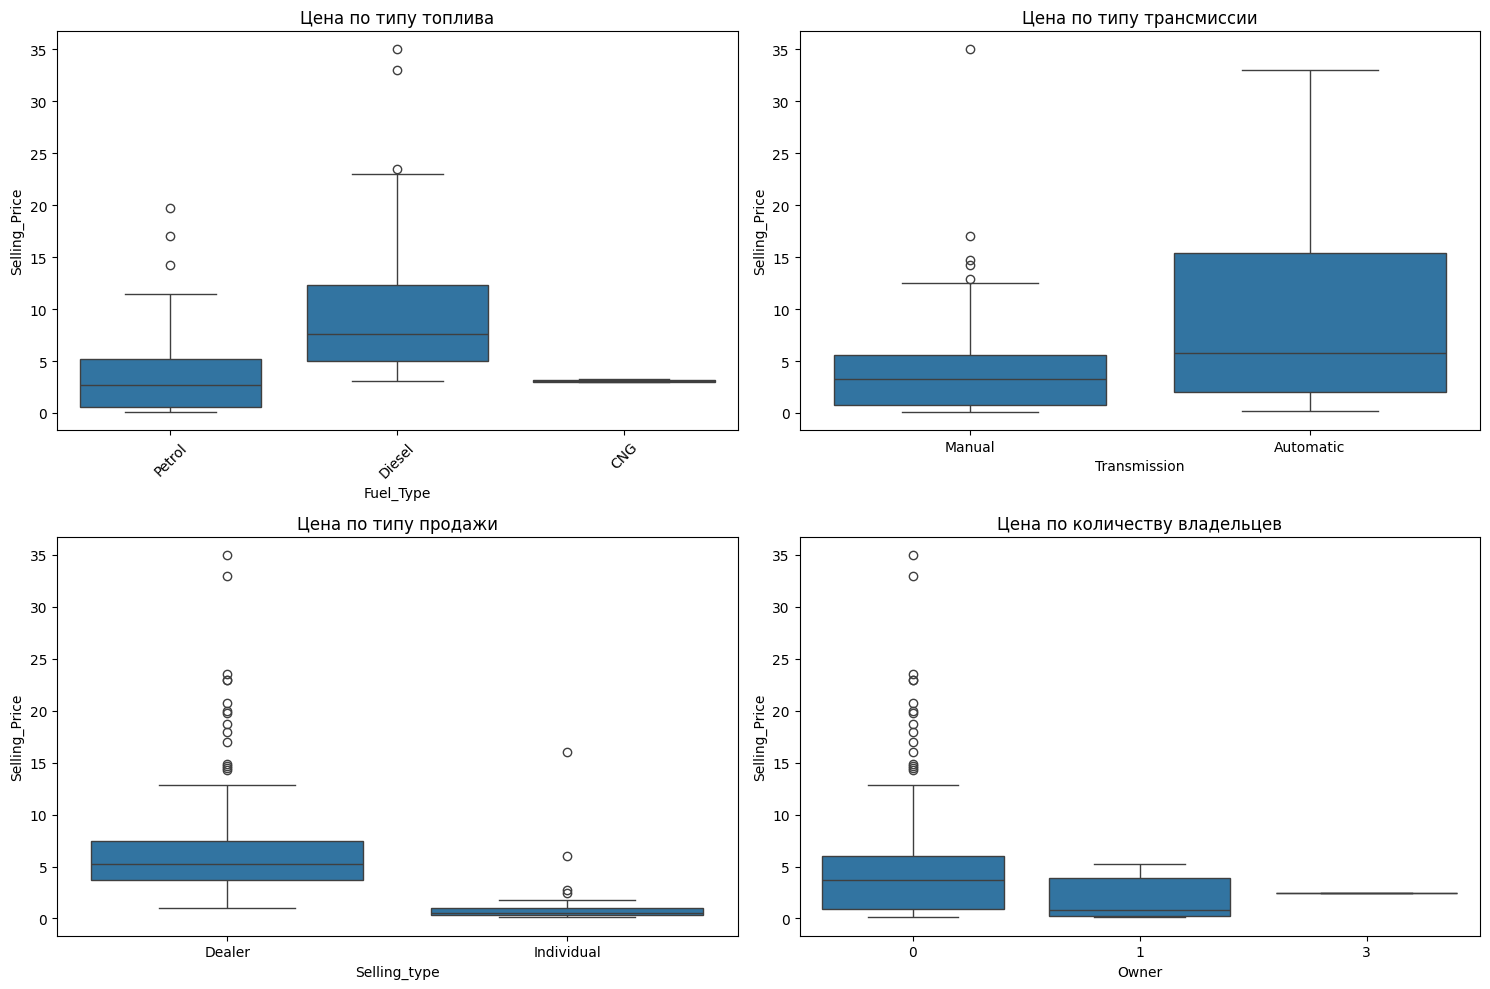

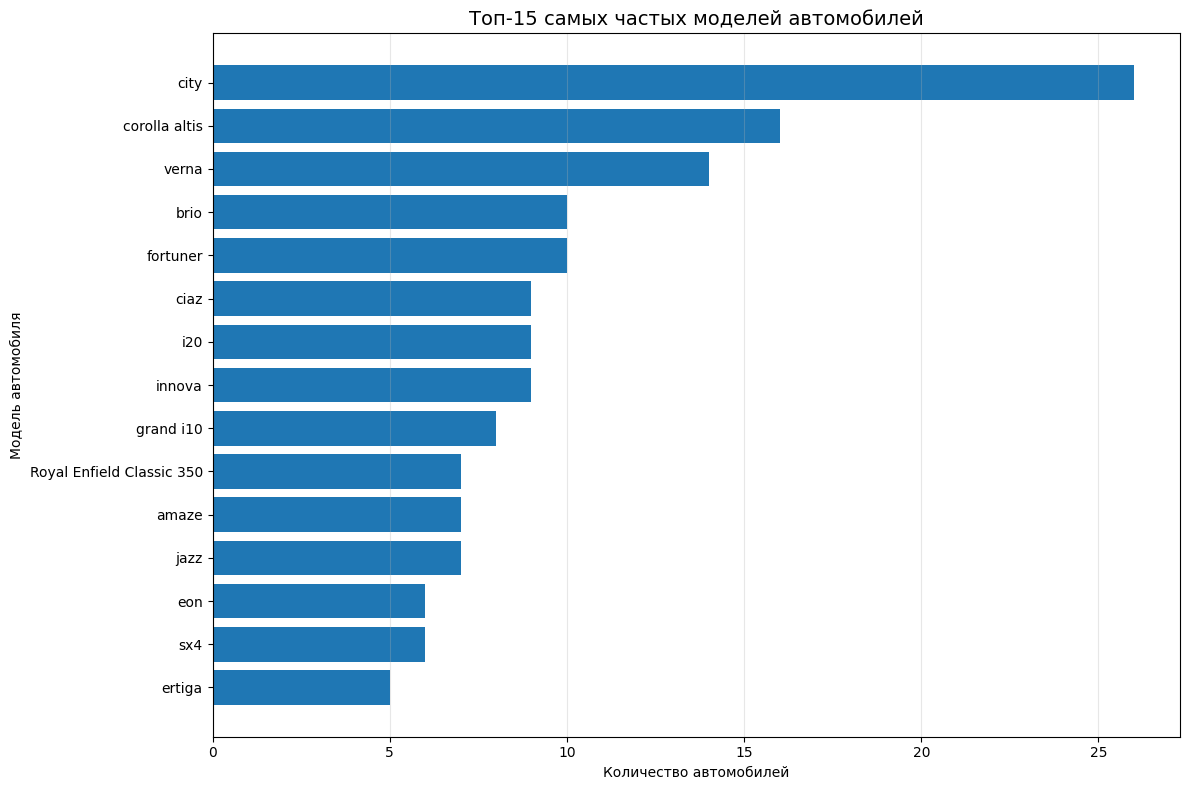

/tmp/ipykernel_40282/1793236579.py:75: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



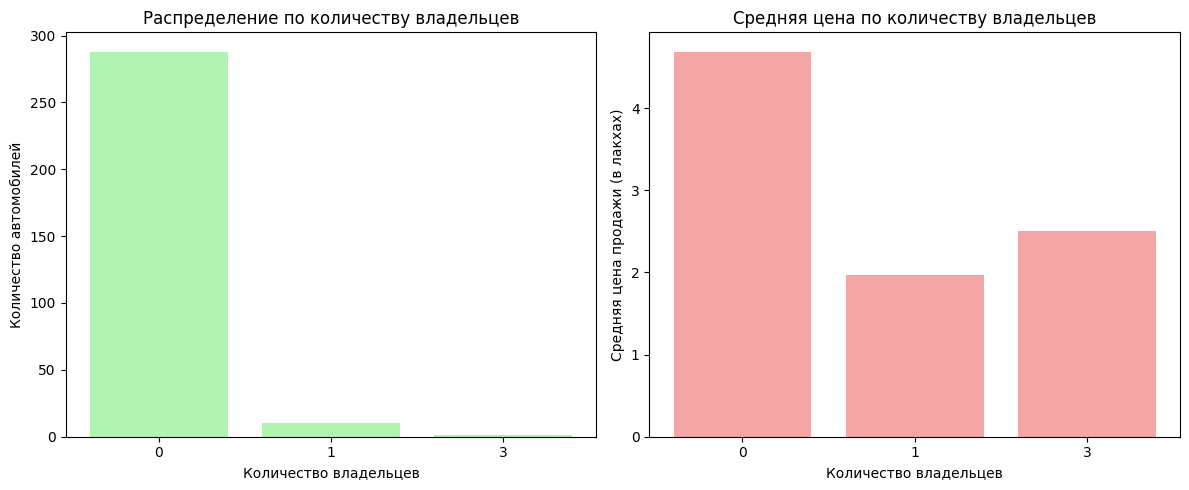

In [23]:
fig = px.histogram(df, x='Selling_Price', nbins=80,
                   title='Распределение цены продажи автомобилей',
                   labels={'Selling_Price': 'Цена продажи (в лакхах)'})
fig.write_html("hist_selling_price.html", auto_open=True)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Selling_Price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение цены продажи')
plt.xlabel('Цена продажи (в лакхах)')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
plt.boxplot(df['Selling_Price'])
plt.title('Boxplot цены продажи')
plt.ylabel('Цена продажи (в лакхах)')

plt.subplot(1, 3, 3)
sns.kdeplot(df['Selling_Price'], fill=True)
plt.title('Плотность распределения цены')
plt.xlabel('Цена продажи (в лакхах)')

plt.tight_layout()
plt.savefig('../eda/price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Цена по типу топлива')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Цена по типу трансмиссии')

plt.subplot(2, 2, 3)
sns.boxplot(x='Selling_type', y='Selling_Price', data=df)
plt.title('Цена по типу продажи')

plt.subplot(2, 2, 4)
sns.boxplot(x='Owner', y='Selling_Price', data=df)
plt.title('Цена по количеству владельцев')

plt.tight_layout()
plt.savefig('../eda/boxplots_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
top_cars = df['Car_Name'].value_counts().head(15)
plt.barh(range(len(top_cars)), top_cars.values)
plt.yticks(range(len(top_cars)), top_cars.index, fontsize=10)
plt.title('Топ-15 самых частых моделей автомобилей', fontsize=14)
plt.xlabel('Количество автомобилей')
plt.ylabel('Модель автомобиля')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../eda/top_cars.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
owner_counts = df['Owner'].value_counts().sort_index()
plt.bar(owner_counts.index.astype(str), owner_counts.values, alpha=0.7, color='lightgreen')
plt.title('Распределение по количеству владельцев')
plt.xlabel('Количество владельцев')
plt.ylabel('Количество автомобилей')

plt.subplot(1, 2, 2)
owner_price = df.groupby('Owner')['Selling_Price'].mean()
plt.bar(owner_price.index.astype(str), owner_price.values, alpha=0.7, color='lightcoral')
plt.title('Средняя цена по количеству владельцев')
plt.xlabel('Количество владельцев')
plt.ylabel('Средняя цена продажи (в лакхах)')
plt.tight_layout()
plt.savefig('../eda/owner_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [18]:
df.to_csv('../data/car_data_cleaned.csv', index=False)
print("Очищенный датасет сохранен как 'car_data_cleaned.csv'")

# %%
# Основные характеристики финального датасета
print("Финальный размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())

Очищенный датасет сохранен как 'car_data_cleaned.csv'
Финальный размер датасета: (299, 9)

Типы данных:
Car_Name           object
Year                int64
Selling_Price     float64
Present_Price     float64
Driven_kms          int64
Fuel_Type          object
Selling_type       object
Transmission       object
Owner            category
dtype: object

Пропущенные значения:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [20]:
print("ОСНОВНЫЕ ВЫВОДЫ:")
print("=" * 50)

print(f"1. Размер данных: {df.shape[0]} автомобилей, {df.shape[1]} характеристик")
print(f"2. Целевая переменная: Selling_Price (цена продажи)")

print(f"3. Статистики целевой переменной:")
print(f"   - Средняя цена: {df['Selling_Price'].mean():.2f} лакхов")
print(f"   - Медианная цена: {df['Selling_Price'].median():.2f} лакхов")
print(f"   - Разброс: от {df['Selling_Price'].min():.2f} до {df['Selling_Price'].max():.2f} лакхов")

print(f"4. Числовые признаки: {len(numeric_cols)}")
print(f"5. Категориальные признаки: {len(categorical_cols)}")

# Анализ корреляций
correlations = df[numeric_cols].corr()['Selling_Price'].sort_values(ascending=False)
top_corr = correlations.drop('Selling_Price').head(3)
print(f"6. Наибольшая корреляция с ценой продажи:")
for feature, corr in top_corr.items():
    print(f"   - {feature}: {corr:.3f}")

# Анализ категориальных признаков
print(f"7. Анализ категориальных признаков:")
print(f"   - Типы топлива: {df['Fuel_Type'].unique()}")
print(f"   - Типы трансмиссии: {df['Transmission'].unique()}")
print(f"   - Типы продажи: {df['Selling_type'].unique()}")
print(f"   - Количество владельцев: {df['Owner'].unique()}")

print(f"8. Количество уникальных моделей: {df['Car_Name'].nunique()}")

ОСНОВНЫЕ ВЫВОДЫ:
1. Размер данных: 299 автомобилей, 9 характеристик
2. Целевая переменная: Selling_Price (цена продажи)
3. Статистики целевой переменной:
   - Средняя цена: 4.59 лакхов
   - Медианная цена: 3.51 лакхов
   - Разброс: от 0.10 до 35.00 лакхов
4. Числовые признаки: 4
5. Категориальные признаки: 5
6. Наибольшая корреляция с ценой продажи:
   - Present_Price: 0.876
   - Year: 0.234
   - Driven_kms: 0.029
7. Анализ категориальных признаков:
   - Типы топлива: ['Petrol' 'Diesel' 'CNG']
   - Типы трансмиссии: ['Manual' 'Automatic']
   - Типы продажи: ['Dealer' 'Individual']
   - Количество владельцев: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
8. Количество уникальных моделей: 98
